In [2]:
%load_ext autoreload
%autoreload 2
import random
import numpy as np
import matplotlib.pyplot as plt
from utils import plot_NQueens, plot_evolution

# Local Search: Genetic Algorithm

## 1.Genrating Phrases

In this section we consider a toy problem: generating a target phrases (e.g. "genetic algorithm") from an initial polupation of random strings. Assume the length of the target is known.

Problem Formulation: 

1. Direct Representation: just strings.
2. Exponential Search Space: $m^l$ where $m$ is the size of the alphabet (set of characters in our interest) and $l$ is the length of the string.

Now that we want to solve it with GA:
1. Chromesome: directly use the string itself.
2. Fitness: how match/close an individual is to the target.
3. Mating: combine two strings in someway to generate a new one.

The following cells will walk you through this problem to show the basic idea of GA

In [3]:
# setting up the problem
target = 'Genetic Algorithm by 12110524'
u_case = [chr(x) for x in range(65, 91)]
l_case = [chr(x) for x in range(97, 123)]
numbers = [chr(x) for x in range(48, 58)]
gene_pool = u_case + l_case + [' '] + numbers # all English chracters and white space

def init_population(pop_size, gene_pool, state_length):
    """
    Randomly initialize a population for genetic algorithm
        pop_size  :  Number of individuals in population
        gene_pool   :  List of possible values for individuals
        state_length:  The length of each individual
    """

#     population = ['D5SnU yoeBrV9DwyWsMPW Q6O9Rf0',
#  'kNIe0Hzan4rRbCGMUufdWmsWlmg6a',
#  'O uASkp5mvZ3CqeVVaoLOT75KLRa7',
#  'ZQiFRMRhPjuyWA2n8WnT6bnwQRKo8',
#  '5eav2W3YkRWeheLv1KqclnfFsAAX ',
#  'kRWJzIUf2vkXQApwehuTXl8h7t7sh',
#  'cBwbEs7UlJMgLqh  P0IAOpkLxT0v',
#  'G7PjE6nR0MgppDsdqtBt2i0a45sDG',
#  'doKGDtDq2zE5rlo5EcPpg5V aulLm',
#  'qe9l8aOdCJsPz8RGw zXjpqSrK0Ud']
    population = []
    for _ in range(pop_size):
        new_individual = "".join(random.choices(gene_pool, k=state_length))
        population.append(new_individual)

    return population

# test
init_pop = init_population(10, gene_pool, len(target))
init_pop

['2TIrAuobNPw q0H8VqGlT9lrL8XmT',
 'nAO7VNOCpFI1rMwci7p5irb5V3FCW',
 'Vp5kmWGqdQOsj4gBPnN3K cafCRTo',
 '7WqaOFVVRisVam5tu1pcCOOtyhe3J',
 'ewSY0aPZDeG2RtI3W1OWxnORJofsV',
 'OoN4YIsTK7PhJvC GNlSJXZFgI91M',
 'PlXRtaUdXQ4neOjFcxFScif4OnFPt',
 'TgFY02DzjQ6G OeyUHZCAiMVqaPt7',
 'sVrOTulLcym1JHeCBByFopZh5 FBq',
 'MKQYR4cYEAqHewFGtXfGwXqML0hpx']

In [4]:
def fitness_fn(sample):
    # TODO: evaluate how close *sample* is to the target
    cnt = 0
    for i in range(len(sample)):
        if (sample[i] == target[i]):
            cnt += 1
    return cnt
    raise NotImplementedError()

# test
fitness_fn(init_pop[0])

0

In [5]:
def select(r, population:list, fitness_fn):
    """
    TODO: select *r* samples from *population*
    the simplest choice is to sample from *population* with each individual weighted by its fitness
    """
    population.sort(key = fitness_fn, reverse = True)
    return population[:r]
    raise NotImplementedError()

# test
parents = select(2, init_pop, fitness_fn)
parents, fitness_fn(parents[0]), fitness_fn(parents[1])

(['MKQYR4cYEAqHewFGtXfGwXqML0hpx', 'nAO7VNOCpFI1rMwci7p5irb5V3FCW'], 2, 1)

In [6]:
def recombine(x, y):
    """
    TODO: combine two parents to produce an offspring
    """
    # mid = random.randint(1, len(x))
    # return x[:mid]+y[mid:]
    child = ''
    for i in range(len(x)):
        if x[i] == target[i]:
            child += x[i]
        elif y[i] == target[i]:
            child += y[i]
        else:
            child += (x[i] if random.randint(0, 1) == 0 else y[i])
    return child
    raise NotImplementedError()

print(recombine(parents[0], parents[1]))

def mutate(x, gene_pool, pmut):
    """
    apply mutation to *x* by randomly replacing one of its gene from *gene_pool*
    """
    if random.uniform(0, 1) >= pmut:
        return x

    n = len(x)
    g = len(gene_pool)
    c = random.randrange(0, n)
    r = random.randrange(0, g)

    new_gene = gene_pool[r]
    return x[:c] + new_gene + x[c + 1:]

# test
child = mutate(recombine(*parents), gene_pool, 0.1)
child

nKQYV4cCpFIHrwFci7p5irbML0Fpx


'MKQYRNcYEFqHrwFGt7fGwXq5L0FpW'

In [7]:
# now refactor things into a *Problem* abstraction
# you can directly reuse what you have implemented above
from abc import ABC, abstractmethod

class GAProblem(ABC):
    @abstractmethod
    def init_population(self, pop_size): pass

    @abstractmethod
    def fitness(self, sample): pass

    @abstractmethod
    def reproduce(self, population): pass

    @abstractmethod
    def replacement(self, old, new): pass

class PhraseGeneration(GAProblem):
    def __init__(self, target, alphabet):
        self.target = target
        self.alphabet = alphabet

    def init_population(self, pop_size):
        return init_population(pop_size, self.alphabet, len(self.target))
        raise NotImplementedError()

    def fitness(self, sample):
        # TODO: evaluate how close *sample* is to the target
        return fitness_fn(sample)
        raise NotImplementedError()
    
    def reproduce(self, population, mutation_rate):
        """
        TODO: generate the next generation of population

        hint: make a new individual with 
        
        mutate(recombine(*select(2, population, fitness_fn)), gene_pool, pmut)

        """
        return [mutate(recombine(*select(2, population, fitness_fn)), gene_pool, mutation_rate)
                for _ in range(len(population))]
        raise NotImplementedError()
    
    def replacement(self, old, new):
        """
        You can use your own strategy, for example retain some solutions from the old population
        """
        return new

def genetic_algorithm(
        problem: GAProblem, 
        ngen, n_init_size, mutation_rate, 
        log_intervel=100
    ):

    population = problem.init_population(n_init_size)
    best = max(population, key=problem.fitness)
    history = [(0, list(map(problem.fitness, population)))]

    for gen in range(ngen):
        next_gen    = problem.reproduce(population, mutation_rate)
        population  = problem.replacement(population, next_gen)

        if gen % log_intervel == 0:
            current_best = max(population, key=problem.fitness)
            if problem.fitness(current_best) > problem.fitness(best): best = current_best
            print(f"Generation: {gen}/{ngen},\tBest: {best},\tFitness={problem.fitness(best)}")         
            history.append((gen, list(map(problem.fitness, population))))
    
    history.append((ngen-1, list(map(problem.fitness, population))))
    return best, history

In [8]:
# now set up the parameters
ngen = 900
max_population = 32
mutation_rate = 0.2333

sid = 12110524 #TODO:  replace this with your own sid
target = f"Genetic Algorithm by {sid}" 
numbers = [chr(x) for x in range(48, 58)]
alphabet = u_case + l_case + [' '] + numbers # TODO: fix this: what is the search space now?

problem = PhraseGeneration(target, alphabet)

# and run it
solution, history = genetic_algorithm(problem, ngen, max_population, mutation_rate)
solution

Generation: 0/900,	Best: voveMNl Z80i8qNjH bt yBFue9Y6,	Fitness=5
Generation: 100/900,	Best: G0ieyNc Z88n4qEjn bt LBtud5V4,	Fitness=9
Generation: 200/900,	Best: GjiexTc wrg04qfjm bF L21105V4,	Fitness=15
Generation: 300/900,	Best: GenexTc Xrg9r4fhm bF Z2110524,	Fitness=20
Generation: 400/900,	Best: GeneATc Arg9rithm bX 52110524,	Fitness=23
Generation: 500/900,	Best: Genetic Alg1rithm by 12110524,	Fitness=28
Generation: 600/900,	Best: Genetic Algorithm by 12110524,	Fitness=29
Generation: 700/900,	Best: Genetic Algorithm by 12110524,	Fitness=29
Generation: 800/900,	Best: Genetic Algorithm by 12110524,	Fitness=29


'Genetic Algorithm by 12110524'

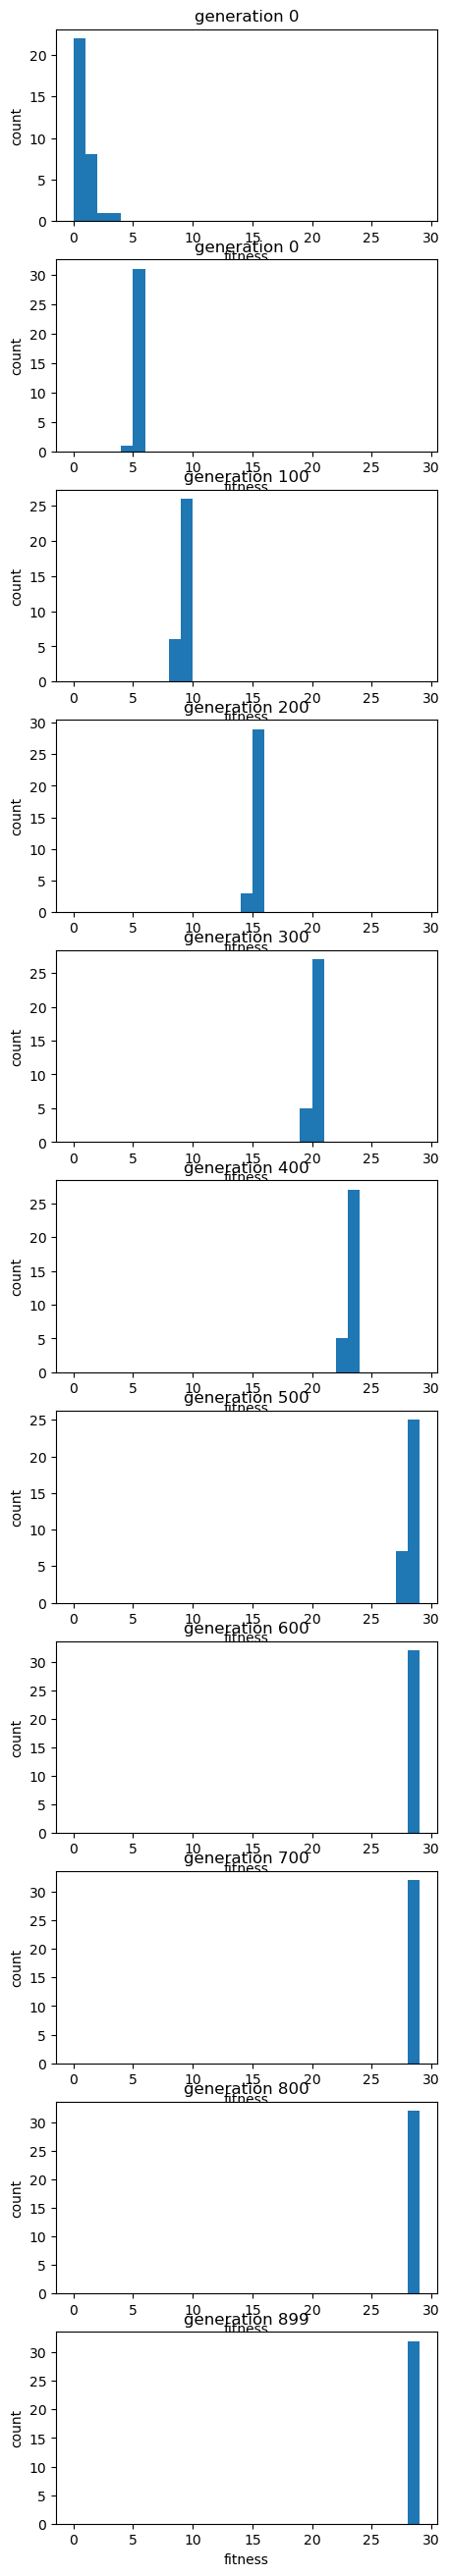

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29.])

In [9]:
# visualize the evolution of the polulation
problem.max_fitness = len(target)
bins = np.linspace(0, problem.max_fitness, problem.max_fitness+1)
plot_evolution(history, bins)
bins

## 2. N-Queens Problem

It is possible to solve the N-Queens problem with slight modifications.

For the problem:

1. Direct Representation: placement of queens.
2. Search Space: $n^n$, if we don't use any constraints.

To use GA:

Actually a new fitness function is the minimum modification you need for this problem.

Others are alomost the same as the previous problem.

In [35]:
class NQueensProblem(GAProblem):
    def __init__(self, n):
        self.n = n
        self.max_fitness =  n*(n-1)//2 # max number if non-attacking pairs

    def init_population(self, pop_size):
        # TODO:alomost the same as the previous problem.
        population = []
        for _ in range(pop_size):
            p = []
            for i in range(self.n):
                p.append(random.randint(0, self.n-1))
            population.append(p)
        return population
        raise NotImplementedError()
    
    def fitness(self, queens):
        """
        TODO
        hint: count the non-attacking pairs
        """
        cnt = 0
        col = [0 for _ in range(self.n)]
        diagonal = [[0 for x in range(self.n*2-1)] for y in range(2)]
        for i in range(self.n):
            cnt += col[queens[i]]+diagonal[0][i+queens[i]]+diagonal[1][i-queens[i]+self.n-1]
            col[queens[i]] += 1
            diagonal[0][i+queens[i]] += 1
            diagonal[1][i-queens[i]+self.n-1] += 1
        return self.max_fitness-cnt
        raise NotImplementedError()

    def reproduce(self, population, mutation_rate):
        # TODO:alomost the same as the previous problem.
        next_gen = []
        for _ in range(len(population)):
            parents = random.sample(population, 2)
            mid = random.randint(0, self.n)
            child = parents[0][:mid]+parents[1][mid:]
            if random.random() < mutation_rate:
                p = random.randint(0, self.n-1)
                child[p] = random.randint(0, self.n-1)
            next_gen.append(child)
        return next_gen
        raise NotImplementedError()

    def replacement(self, old, new):
        """
        You can use your own strategy, for example retain some solutions from the old population
        """
        tmp = old+new
        tmp.sort(key = self.fitness, reverse = True)
        return tmp[:len(old)]

    def __repr__(self):
        return f"{self.n}-Queens Problem"

In [67]:
from utils import plot_NQueens
ngen = 301
init_size = 1024
mutation_rate = 0.49

n = 21
problem = NQueensProblem(n)
solution, history = genetic_algorithm(problem, ngen, init_size, mutation_rate)
solution, problem.max_fitness-problem.fitness(solution)

Generation: 0/301,	Best: [10, 11, 1, 12, 0, 16, 19, 19, 3, 0, 13, 18, 13, 17, 19, 20, 2, 7, 1, 15, 17],	Fitness=199
Generation: 100/301,	Best: [2, 14, 19, 6, 8, 0, 12, 15, 18, 16, 3, 5, 11, 4, 10, 20, 13, 17, 1, 9, 7],	Fitness=210
Generation: 200/301,	Best: [2, 14, 19, 6, 8, 0, 12, 15, 18, 16, 3, 5, 11, 4, 10, 20, 13, 17, 1, 9, 7],	Fitness=210
Generation: 300/301,	Best: [2, 14, 19, 6, 8, 0, 12, 15, 18, 16, 3, 5, 11, 4, 10, 20, 13, 17, 1, 9, 7],	Fitness=210


([2, 14, 19, 6, 8, 0, 12, 15, 18, 16, 3, 5, 11, 4, 10, 20, 13, 17, 1, 9, 7], 0)

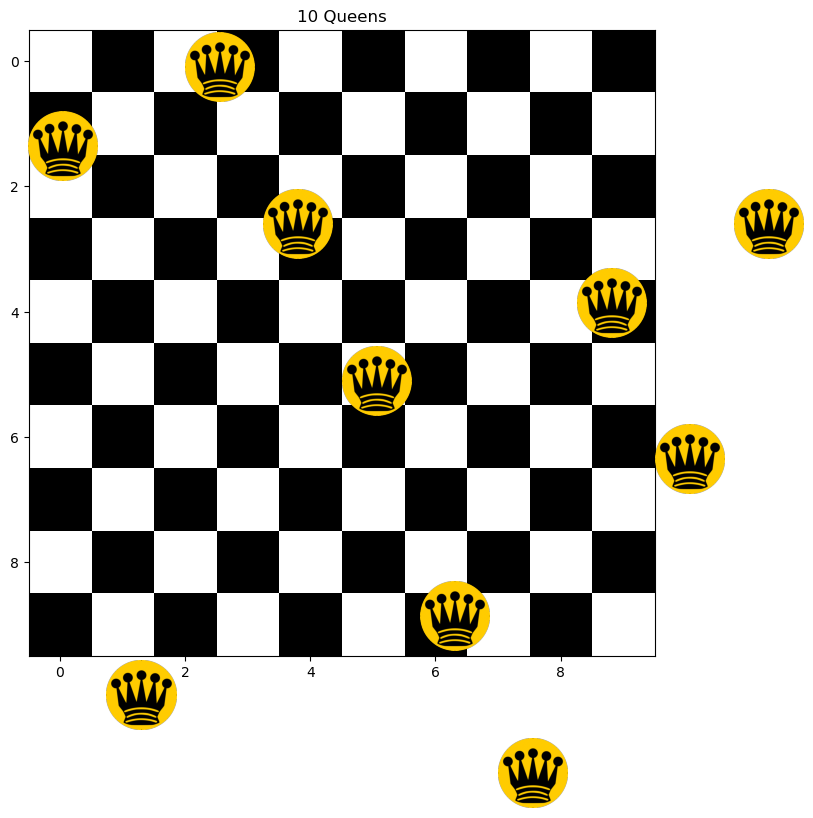

In [44]:
# Example of how to use this function
# plot_NQueens([4, 2, 0, 6, 1, 7, 5, 3])
# replace the parameter with your own results
plot_NQueens(solution)

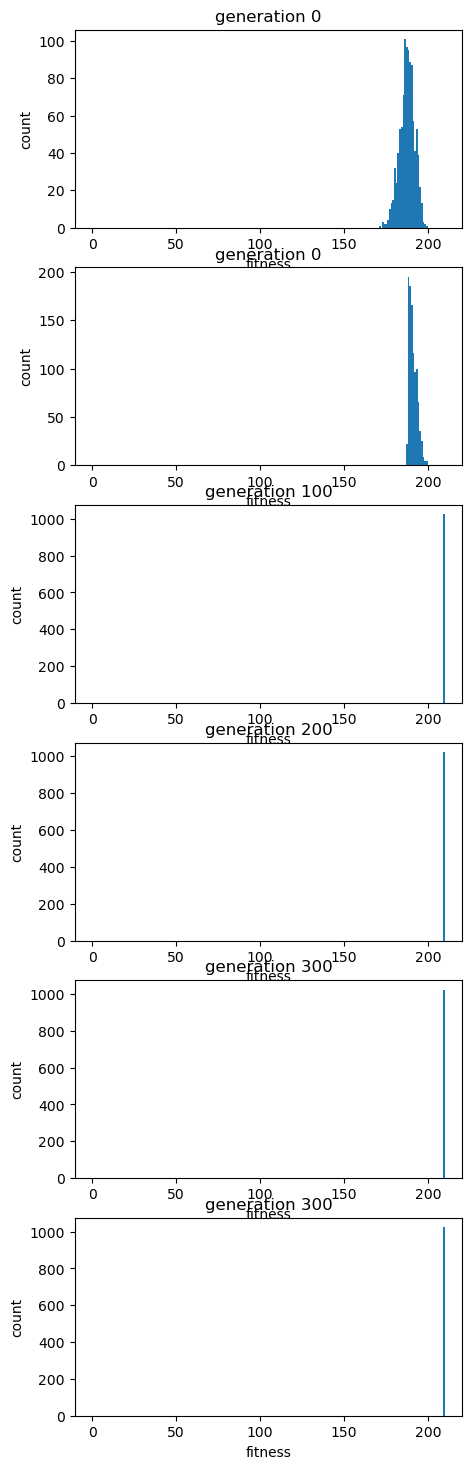

In [68]:
# Visualize the evolution of the polulation
bins = np.linspace(0, problem.max_fitness, problem.max_fitness)
plot_evolution(history, bins)